<a href="https://colab.research.google.com/github/Aninda07/CVPR/blob/main/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


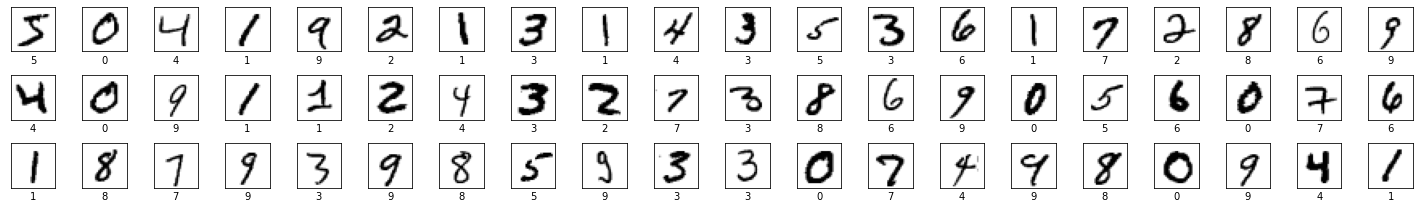

In [ ]:
 ROWS = 3
COLS = 20
i = 0
 
plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [3]:
 
#Normalise Data
 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype("float32")/255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype("float32")/255

In [ ]:
 
#Or Without Normalisation of Data
 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Image (#9): Which is digit '4'


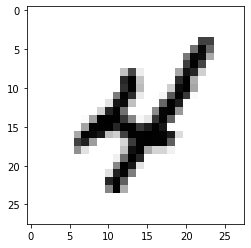

In [ ]:
 digit = 9 # Change to choose new digit
a = X_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")

In [4]:
 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [5]:
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [6]:
 from keras.optimizers import SGD

In [7]:
opt = SGD(learning_rate=0.01, momentum=0.9)
   
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
 
#With Normalisation 
 
h = model.fit(x=X_train, y=Y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 43s 19ms/step - loss: 0.3330 - accuracy: 0.8983 - val_loss: 0.0915 - val_accuracy: 0.9755
Epoch 2/3
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0651 - accuracy: 0.9815 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 3/3
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.0547 - val_accuracy: 0.9837


In [ ]:

#Or Without Normalisation 
 
h = model.fit(x=X_train, y=Y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 28s 18ms/step - loss: 125.4426 - accuracy: 0.1163 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/3
1500/1500 [==============================] - 27s 18ms/step - loss: 2.3010 - accuracy: 0.1157 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/3
1500/1500 [==============================] - 27s 18ms/step - loss: 2.3017 - accuracy: 0.1146 - val_loss: 2.3022 - val_accuracy: 0.1060


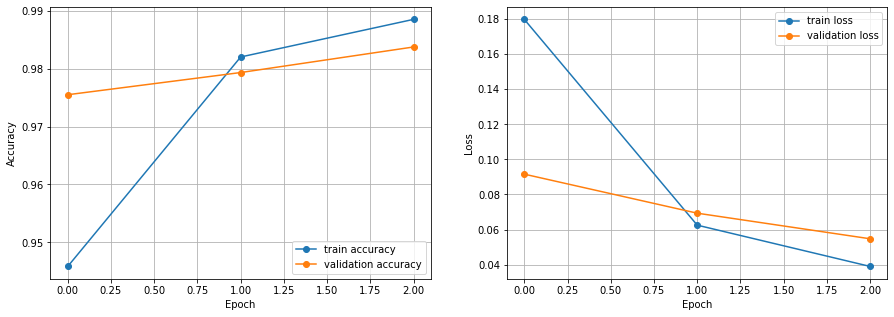

In [ ]:
 
#Plot With Normalisation 
 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
 
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
 
plt.show()

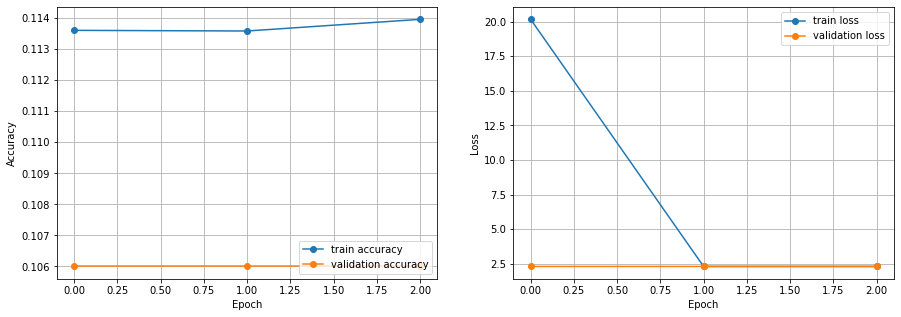

In [ ]:
 #Plot Without Normalisation 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
 
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
 
plt.show()